""" Datasets https://www.kaggle.com/datasets/ibamibrahim/indonesian-news-title """

In [2]:
import pandas as pd

df = pd.read_csv('indonesian_news_title.csv')
df = df.drop(columns=['date','url'])
df.title = df.title.astype(str)
df

,title,category
0,Kemnaker Awasi TKA di Meikarta,finance
1,BNI Digitalkan BNI Java Jazz 2020,finance
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance
...,...,...
41132,Ilmuwan Ungkap Ada yang Aneh di Matahari,inet
41133,Bill Gates Ungkap Vaksin Corona Mungkin Tak Se...,inet
41134,Game The Last of Us Part II Siap Dirilis di In...,inet
41135,Fitur Baru Google Maps Beri Peringatan Soal Co...,inet


In [3]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,title,finance,food,health,hot,inet
0,Kemnaker Awasi TKA di Meikarta,1,0,0,0,0
1,BNI Digitalkan BNI Java Jazz 2020,1,0,0,0,0
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",1,0,0,0,0
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,1,0,0,0,0
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,1,0,0,0,0
...,...,...,...,...,...,...
41132,Ilmuwan Ungkap Ada yang Aneh di Matahari,0,0,0,0,1
41133,Bill Gates Ungkap Vaksin Corona Mungkin Tak Se...,0,0,0,0,1
41134,Game The Last of Us Part II Siap Dirilis di In...,0,0,0,0,1
41135,Fitur Baru Google Maps Beri Peringatan Soal Co...,0,0,0,0,1


In [4]:
teks = df_baru['title'].values
label = df_baru[['finance','food','health','hot','inet']].values

In [5]:
from sklearn.model_selection import train_test_split

teks_latih, teks_test, label_latih, label_test = train_test_split(teks, label, test_size=.2)

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(teks_latih) 
tokenizer.fit_on_texts(teks_test)
 
sekuens_latih = tokenizer.texts_to_sequences(teks_latih)
sekuens_test = tokenizer.texts_to_sequences(teks_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [7]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if((logs.get('accuracy') >= 0.91) and (logs.get('val_accuracy') >= 0.91)):
      print("\n Proses dihentikan karena tingkat akurasi sudah di atas 90%!!")
      self.model.stop_training = True

callbacks = myCallback()

In [9]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
1029/1029 - 21s - loss: 0.6212 - accuracy: 0.7626 - val_loss: 0.3514 - val_accuracy: 0.8856 - 21s/epoch - 21ms/step
Epoch 2/30
1029/1029 - 16s - loss: 0.2816 - accuracy: 0.9087 - val_loss: 0.2841 - val_accuracy: 0.9022 - 16s/epoch - 15ms/step
Epoch 3/30
1029/1029 - 16s - loss: 0.2079 - accuracy: 0.9300 - val_loss: 0.2886 - val_accuracy: 0.9041 - 16s/epoch - 16ms/step
Epoch 4/30

 Proses dihentikan karena tingkat akurasi sudah di atas 90%!!
1029/1029 - 16s - loss: 0.1686 - accuracy: 0.9452 - val_loss: 0.3008 - val_accuracy: 0.9131 - 16s/epoch - 16ms/step


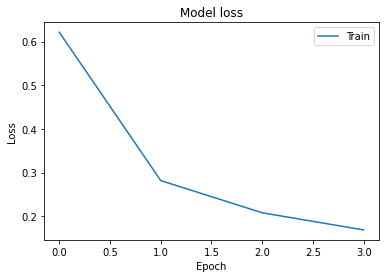

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

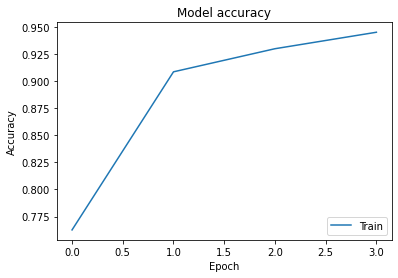

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()